# Iris Flower Classification

# Import libraries 

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

# Import Dataset 

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe().T

count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5

In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 150 rows and 5 columns


In [9]:
# Value counts of species
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [10]:
# check for duplicates
df.duplicated().sum()
# drop them
df.drop_duplicates(inplace=True)
# check again
df.duplicated().sum()

np.int64(0)

In [11]:
# 1. Relationship between species and sepal_length using plotly
fig = px.box(df, x='species', y='sepal_length', color='species')
fig.show()

In [12]:
# 2. Relationship between species and sepal_width using plotly
fig = px.box(df, x='species', y='sepal_width', color='species')
fig.show()

In [13]:
# 3. Relationship between species and petal_length using plotly
fig = px.box(df, x='species', y='petal_length', color='species')
fig.show()

In [14]:
# 4. Relationship between species and petal_width using plotly
fig = px.box(df, x='species', y='petal_width', color='species')
fig.show()

In [15]:
# 5. Relationship between sepal_length and sepal_width using plotly
fig = px.scatter(df, x='sepal_length', y='sepal_width', color='species')
fig.show()

In [16]:
# 6. Relationship between petal_length and petal_width using plotly
fig = px.scatter(df, x='petal_length', y='petal_width', color='species')
fig.show()

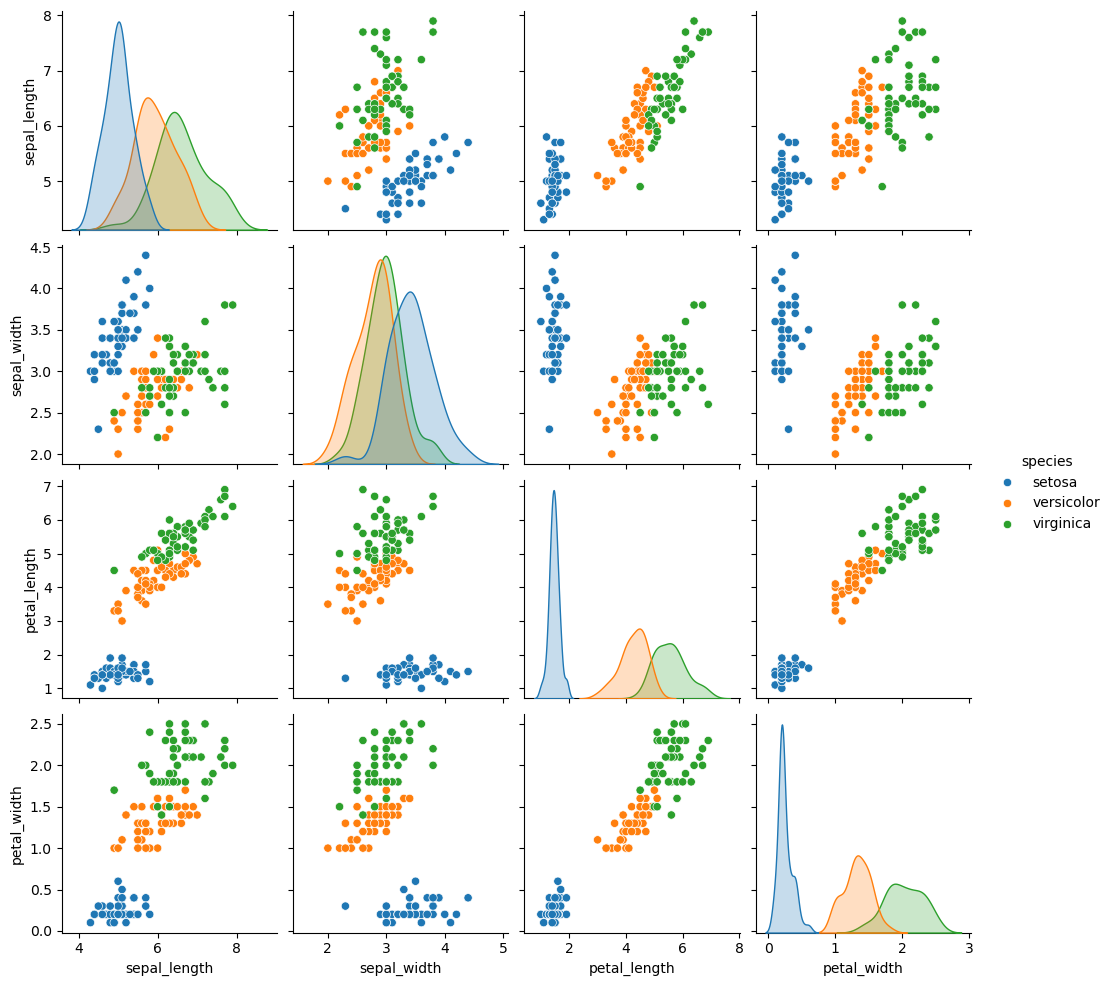

In [17]:
# Pairplot
sns.pairplot(df, hue='species')
plt.show()

# Model Building

In [18]:
# enode the categorical features
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [19]:
# split the data
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [22]:
# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Explicit input layer
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

2025-08-09 10:09:00.638143: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.3765 - loss: 1.1074 - val_accuracy: 0.5000 - val_loss: 1.0881
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4515 - loss: 1.0644 - val_accuracy: 0.5667 - val_loss: 1.0607
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4292 - loss: 1.0509 - val_accuracy: 0.5333 - val_loss: 1.0321
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4572 - loss: 1.0203 - val_accuracy: 0.5333 - val_loss: 1.0027
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4825 - loss: 0.9916 - val_accuracy: 0.4667 - val_loss: 0.9728
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5958 - loss: 0.9502 - val_accuracy: 0.4333 - val_loss: 0.9436
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4996 - loss: 0.9286 - val_accuracy: 0.5000 - val_loss: 0.9148
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6084 - loss: 0.9004 - val_accuracy: 0.6333 - val_loss:

Test Accuracy: 0.9667


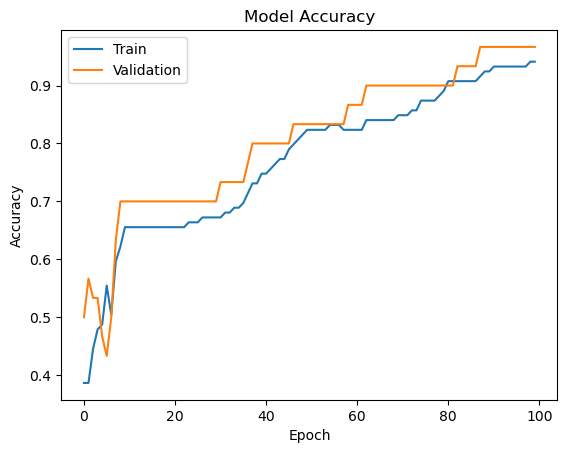

In [24]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

# plot training & validation accuracy values
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
